In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [23]:
data=pd.read_csv('/content/insurance.csv')

In [24]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
# number of rows and columns
data.shape

(1338, 7)

In [26]:
#getting some information about data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [27]:
#checking for missing values

data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Data Analysis

In [28]:
#statical measures of the data set

data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-29-37b130320e78>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


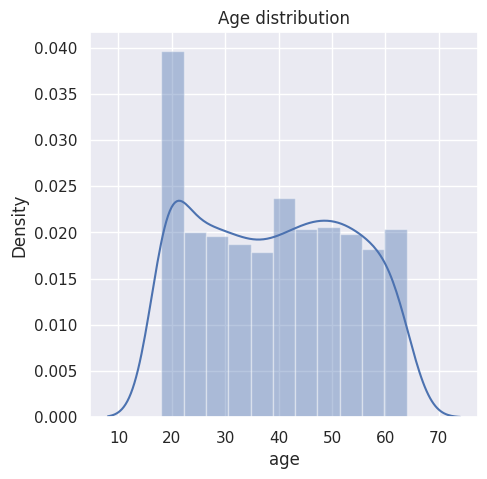

In [29]:
#distributions of age value

sns.set()
plt.figure(figsize=(5,5))
sns.distplot(data['age'])
plt.title('Age distribution')
plt.show()

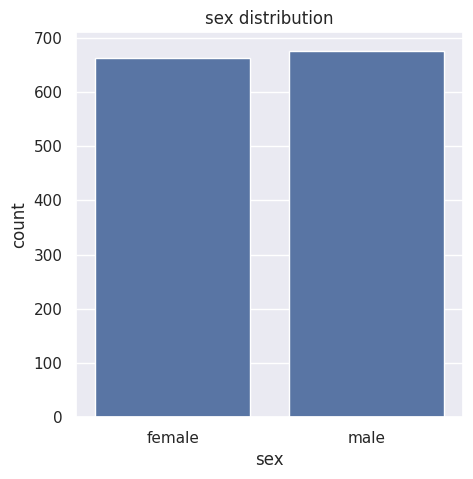

In [30]:
#gender column

plt.figure(figsize=(5,5))
sns.countplot(x='sex',data=data)
plt.title('sex distribution')
plt.show()

In [31]:
data['sex'].value_counts()

,count
sex,
male,676
female,662


<ipython-input-32-249666d7071b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'])


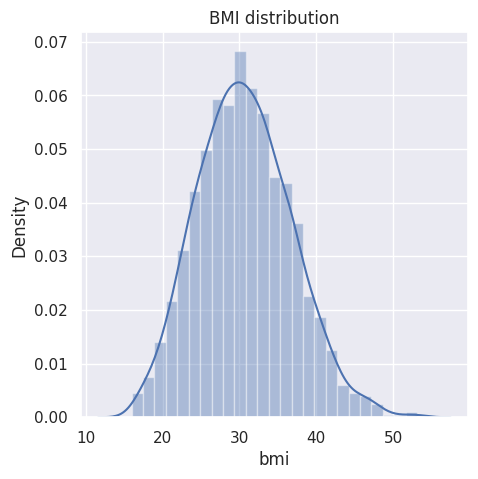

In [32]:
#bmi distribution
plt.figure(figsize=(5,5))
sns.distplot(data['bmi'])
plt.title('BMI distribution')
plt.show()

Normal BMI Range->18.5 to 24.9

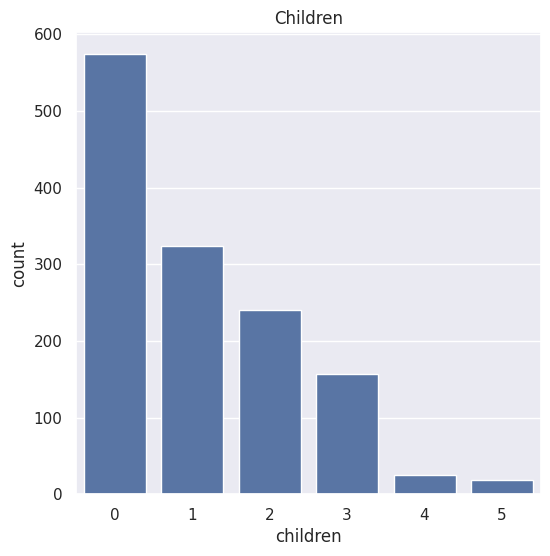

In [33]:
#children column

plt.figure(figsize=(6,6))
sns.countplot(x='children',data=data)
plt.title('Children')
plt.show()

In [34]:
data['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


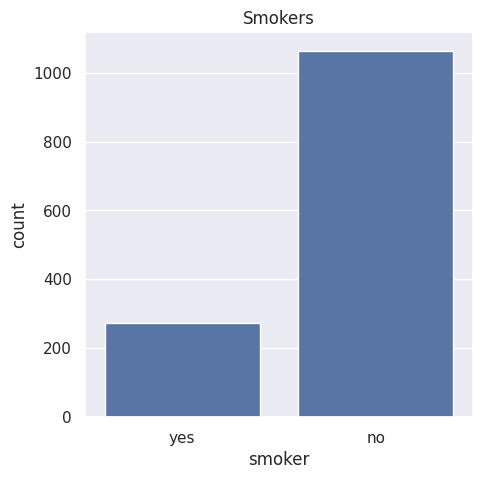

In [35]:
#smoker column

plt.figure(figsize=(5,5))
sns.countplot(x='smoker',data=data)
plt.title('Smokers')
plt.show()

In [36]:
data['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


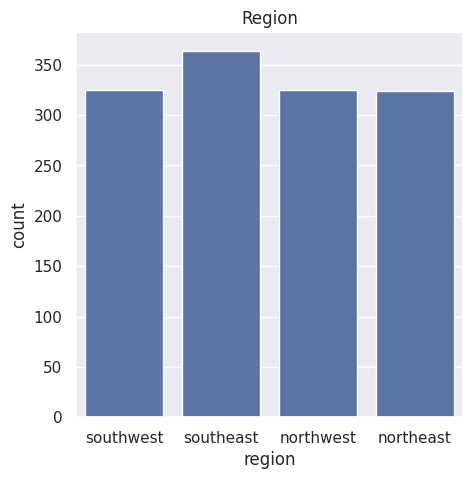

In [37]:
#region column

plt.figure(figsize=(5,5))
sns.countplot(x='region',data=data)
plt.title('Region')
plt.show()

In [38]:
data['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


<ipython-input-39-4abbca709316>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['charges'])


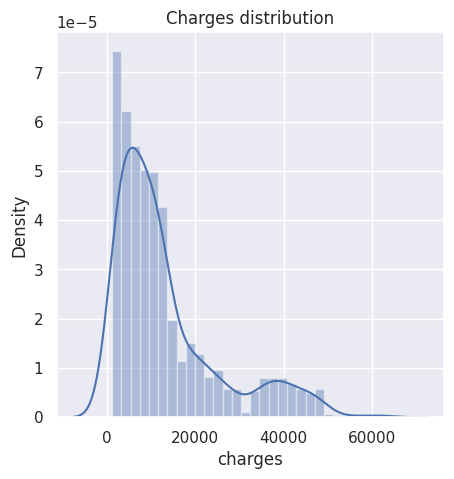

In [39]:
#distribution of charges value

plt.figure(figsize=(5,5))
sns.distplot(data['charges'])
plt.title('Charges distribution')
plt.show()

In [40]:
data['charges'].value_counts()

,count
charges,
1639.56310,2
16884.92400,1
29330.98315,1
2221.56445,1
19798.05455,1
...,...
7345.08400,1
26109.32905,1
28287.89766,1


Data pre-processing

In [41]:
#encoding the categorical features

#sex column

data.replace({'sex':{'male':0,'female':1}},inplace=True)

#smoker column

data.replace({'smoker':{'yes':0,'no':1}},inplace=True)

#region column

data.replace({'region':{'southeast':0,'southnorth':1,'southwest':2,'northwest':3,'northeast':4}},inplace=True)


<ipython-input-41-41b110aa6f1b>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'sex':{'male':0,'female':1}},inplace=True)
<ipython-input-41-41b110aa6f1b>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'smoker':{'yes':0,'no':1}},inplace=True)
<ipython-input-41-41b110aa6f1b>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.

In [42]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,2,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,4,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,2,2007.94500


Splitting the features and target

In [43]:
x=data.drop(columns='charges',axis=1)

y=data['charges']

In [44]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       2
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       4
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       2
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [45]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into Training data and Testing data

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


In [47]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


model training

In [48]:
#loading linear regression model

regressor=LinearRegression()


In [51]:
regressor.fit(x_train,y_train)

LinearRegression()

In [53]:
#prediction on traning data

training_data_prediction=regressor.predict(x_train)

In [55]:
#R squared value

r2_train=metrics.r2_score(y_train,training_data_prediction)
print('Squared value: ',r2_train)

Squared value:  0.7516686478695942


In [58]:
input_data=(35,1,25,74,0,1)

#changing data into numpy array

input_data_as_numpy_array=np.asarray(input_data)

#reshape the array

input_data_reshape=input_data_as_numpy_array.reshape(1,-1)

prediction=regressor.predict(input_data_reshape)

print(prediction)

[71603.70887219]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [60]:
print('THhe insurance is USD',prediction[0])

THhe insurance is USD 71603.70887219318
